Score:  1.0
MSE:  12.99580278352902
Min difference:  0.001462399449291123
Max difference:  76.28273644462583
Standard Deviation of the difference:  17.386172209537815
Preço de fechamento (Aprox.):  [310.56784364]


/home/joelson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


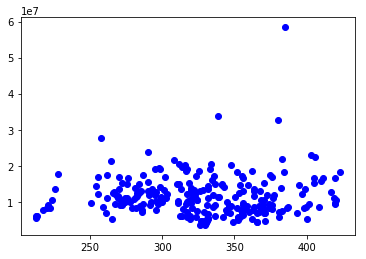

In [24]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

# dataset = pd.read_csv("/home/joelson/Dropbox/Kaggle/datasets/Tesla/tesla.csv")
# Dados da Netflix
dataset = pd.read_csv("/home/joelson/Dropbox/Kaggle/datasets/Netflix/netflix.csv")
dataset = dataset.apply(lambda x: x.str.replace(',','.'))
dataset = dataset.apply(lambda x: x.str.replace('M', ''))
dataset = dataset.apply(lambda x: x.str.replace('%', ''))
dataset = dataset.convert_objects(convert_numeric=True).dropna()
dataset['Vol.'] = dataset['Vol.'] * 10**6
############################################
classes = np.array(dataset['Último'])
dataset = dataset.drop(['Data', 'Var%', 'Último'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(dataset, classes, random_state=0)
model =  LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Score: ", model.score(X_test, y_pred))
print("MSE: ", (np.sum((y_pred - y_test)**2)) / len(y_pred))
print("Min difference: ", np.min((y_pred - y_test)**2))
print("Max difference: ", np.max((y_pred - y_test)**2))
print("Standard Deviation of the difference: ", np.std((y_pred - y_test)**2))

# teste 08/01/2019
                          # [[Abertura, maxima, minima, volume]]
result1 = model.predict([[320.0,  320.47, 308.01, 10827982]])
print("Preço de fechamento (Aprox.): ", result1)

# remoção para plotting abaixo...
dataset = dataset.drop(['Vol.'], axis=1)

In [25]:
display(dataset)

,Abertura,Máxima,Mínima,Vol.
0,320.15,320.15,308.32,10870000.0
1,302.28,316.70,302.24,18620000.0
2,281.88,297.80,278.54,19330000.0
3,270.20,275.79,264.43,14970000.0
4,259.28,269.75,256.58,11680000.0
5,260.16,270.10,260.00,13510000.0
6,257.94,261.91,249.80,10990000.0
7,250.11,255.59,240.10,12240000.0
8,233.92,254.50,231.23,14400000.0
9,242.00,250.65,233.68,9550000.0


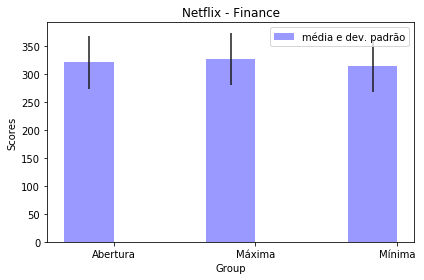

In [62]:
#plotting
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

std = tuple(dataset.std(axis=0))
mean = tuple(dataset.mean(axis=0))
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.1'}

rects1 = ax.bar(index, mean, bar_width,
                alpha=opacity, color='b',
                yerr=std, error_kw=error_config, label='média e dev. padrão')
ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Netflix - Finance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Abertura', 'Máxima', 'Mínima'))
ax.legend()

fig.tight_layout()
plt.show()
